In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)

In [2]:
df=pd.read_csv("clean_customer_df.csv",index_col="Unnamed: 0")

In [3]:
df.head()

,cit,zip_code,latitude,longitude,gender,senior_citizen,partner,dependents,tenure_months,phone_service,device_protection,tech_support,paperless_billing,monthly_charges,churn_value,cltv,satisfaction_score,customer_status,churn_categor,referred_a_friend,number_of_referrals,tenure_in_months,offer,avg_monthly_long_distance_charges,internet_type,avg_monthly_gb_download,device_protection_plan,premium_tech_support,streaming_music,unlimited_data,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,age,under_30,number_of_dependents,internet_services,online_security,online_backup_srvc,multiple_line,streaming_tv_srvc,payment_methods,total_charge,contracts,churn_reasons,streaming_movies_srvc
0,Los Angeles,90003,33.964131,-118.272783,Male,0,0,0,2,1,0,0,1,53.85,1,3239,1,Churned,Competitor,0,0,2,None,10.47,DSL,21,0,0,0,1,0.0,0,20.94,129.09,30,0,0,1,1,1,0,0,Mailed check,108.15,Month-to-Month,Competitor made better offer,0
1,Los Angeles,90005,34.059281,-118.307420,Female,0,0,1,2,1,0,0,1,70.70,1,2701,2,Churned,Other,0,0,2,None,9.12,Fiber Optic,51,0,0,0,1,0.0,0,18.24,169.89,10,1,2,1,0,0,0,0,Electronic check,151.65,Month-to-Month,Moved,0
2,Los Angeles,90006,34.048013,-118.293953,Female,0,0,1,8,1,1,0,1,99.65,1,5372,3,Churned,Other,0,0,8,None,12.15,Cable,26,1,0,1,1,0.0,0,97.20,917.70,30,0,2,1,0,0,1,1,Electronic check,820.50,Month-to-Month,Moved,1
3,Los Angeles,90010,34.062125,-118.315709,Female,0,1,1,28,1,1,1,1,104.80,1,5003,3,Churned,Other,0,0,28,Offer C,4.89,Fiber Optic,47,1,1,1,1,0.0,0,136.92,3182.97,20,1,3,1,0,0,1,1,Electronic check,3046.05,Month-to-Month,Moved,1
4,Los Angeles,90015,34.039224,-118.266293,Male,0,0,1,49,1,1,0,1,103.70,1,5340,1,Churned,Competitor,0,0,49,None,44.33,Fiber Optic,11,1,0,1,1,0.0,0,2172.17,7208.47,30,0,1,1,0,1,1,1,Bank transfer (automatic),5036.30,Month-to-Month,Competitor had better devices,1


Text(0.5, 0, 'Churnned')

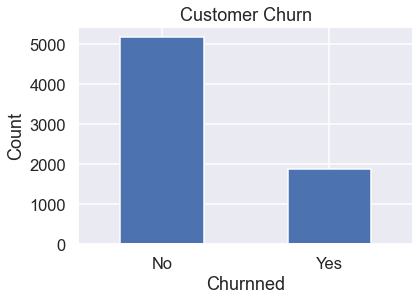

In [4]:
#Plotting target variables
sns.set('talk')
ax=df["churn_value"].value_counts().plot(kind="bar")
ax.set_xticklabels(["No","Yes"],rotation=0)
ax.set_title("Customer Churn")
ax.set_ylabel("Count")
ax.set_xlabel("Churnned")



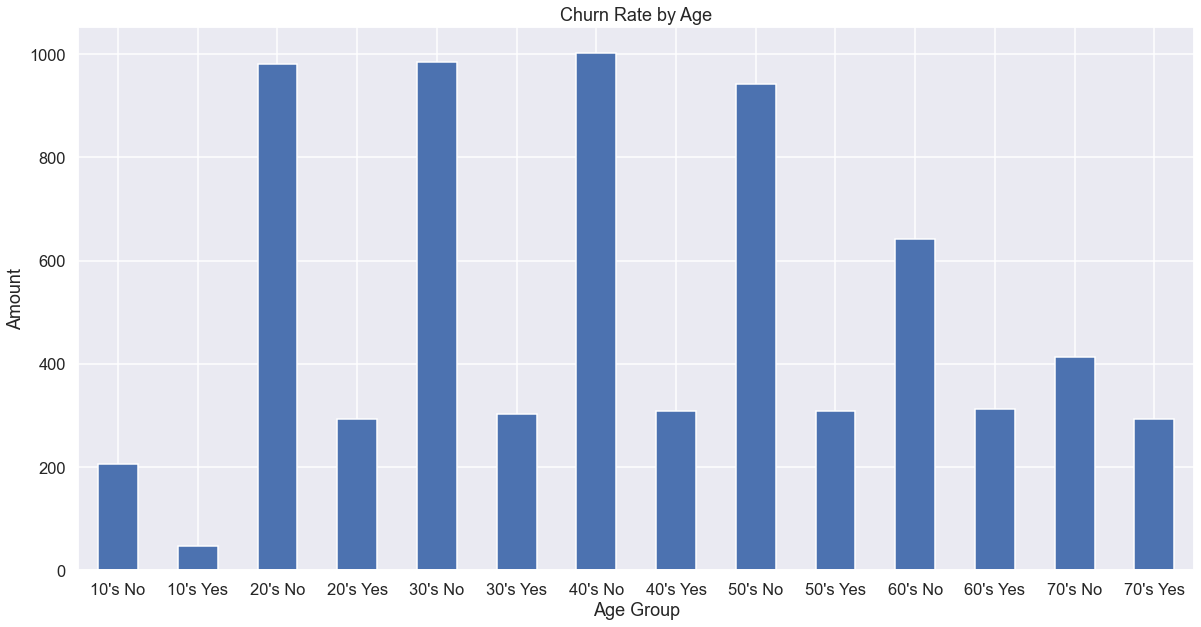

In [5]:
ax=df[["churn_value","age","latitude"]].groupby(["age","churn_value"]).count().plot(kind="bar",figsize=(20,10), legend=None)
ax.set_xticklabels(["10's No","10's Yes","20's No","20's Yes","30's No","30's Yes","40's No","40's Yes","50's No","50's Yes","60's No","60's Yes","70's No","70's Yes"],rotation=0)
ax.set_xlabel("Age Group")
ax.set_ylabel("Amount")
ax.set_title("Churn Rate by Age")
plt.show()

[]

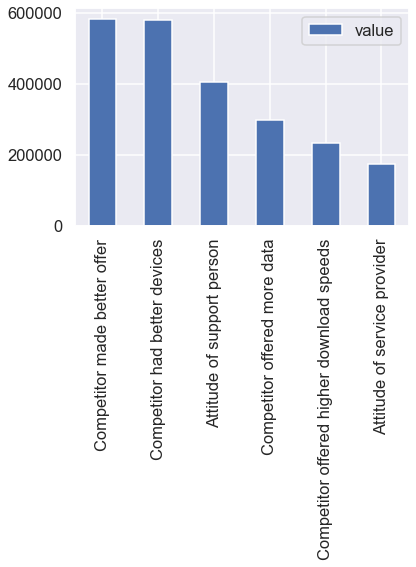

In [7]:
rev_loss=pd.melt(df[df.churn_value==1][["churn_reasons","total_revenue"]].groupby("churn_reasons").sum().T)
rev_loss=rev_loss.iloc[:6].sort_values(by=['value'],ascending=False).reset_index(drop=True)
ax=rev_loss.plot(kind="bar")
ax.set_xticklabels(list(rev_loss["churn_reasons"])[:6])
ax.plot()

<AxesSubplot:>

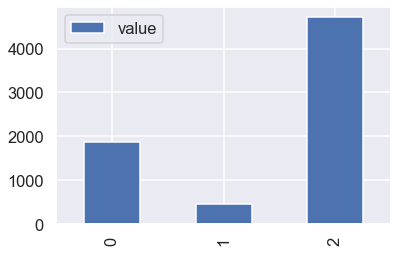

In [8]:
pd.melt(df[["customer_status","churn_reasons"]].groupby("customer_status").count().T).plot(kind="bar")

In [9]:
df.churn_value.value_counts()

0    5174
1    1869
Name: churn_value, dtype: int64